In [2]:
# import packages

In [5]:
import pandas as pd
import pandas_datareader.data as web

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
sns.set_palette(sns.color_palette(flatui,7))

import missingno as msno
p=print


In [6]:
#Get time series data from Yahoo finance and recession data from FRED.

            USREC          SPX        VIX  SPX_returns  VIX_returns
1999-02-01    0.0  1246.582115  28.822632    -0.001757     0.027698
1999-03-01    0.0  1281.663914  25.309565     0.027754    -0.129978
1999-04-01    0.0  1334.756662  23.478571     0.040590    -0.075094
1999-05-01    0.0  1332.074011  26.204500    -0.002012     0.109843
1999-06-01    0.0  1322.552734  23.626364    -0.007173    -0.103568
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 1999-02-01 to 2019-06-01
Data columns (total 5 columns):
USREC          245 non-null float64
SPX            245 non-null float64
VIX            245 non-null float64
SPX_returns    245 non-null float64
VIX_returns    245 non-null float64
dtypes: float64(5)
memory usage: 11.5 KB
None


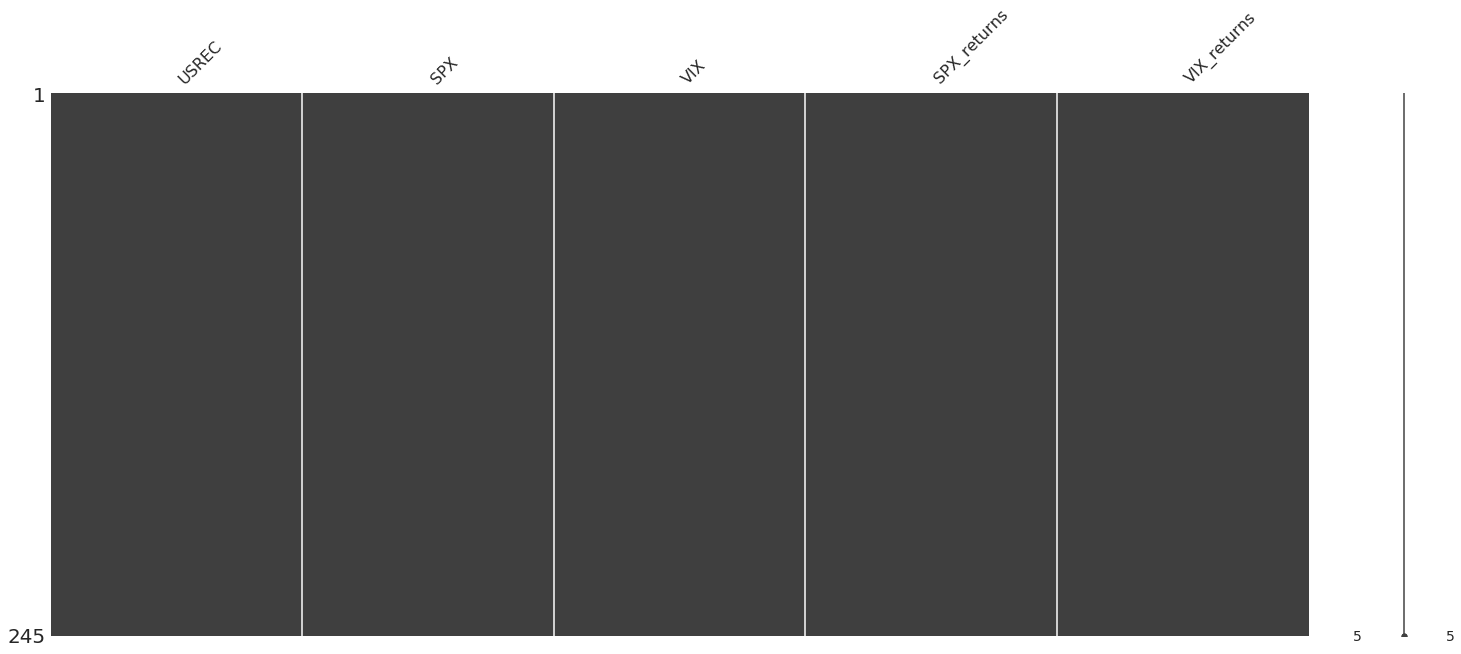

In [7]:
# get index and fed data

f1 = 'USREC' # recession data from FRED

start = pd.to_datetime('1999-01-01')
end = pd.datetime.today()

mkt = '^GSPC'
MKT = (web.DataReader([mkt,'^VIX'], 'yahoo', start, end)['Adj Close']
      .resample('MS') # month start b/c FED data is month start
       .mean()
       .rename(columns={mkt:'SPX','^VIX':'VIX'})
       .assign(SPX_returns=lambda x: np.log(x['SPX']/x['SPX'].shift(1)))
       .assign(VIX_returns=lambda x: np.log(x['VIX']/x['VIX'].shift(1)))
       )

data = (web.DataReader([f1], 'fred', start, end)
        .join(MKT, how='outer')
        .dropna())

p(data.head())
p(data.info())
msno.matrix(data)


In [8]:
# DEFAULT PLOT WITH RECESSION SHADING

In [9]:
# recessions are marked as 1 in the data
recs = data.query('USREC==1')

# Select the two recessions over the time period
recs_2k = recs.ix['2001']
recs_2k8 = recs.ix['2008':]

# now we can grab the indices for the start
# and end of each recession
recs2k_bgn = recs_2k.index[0]
recs2k_end = recs_2k.index[-1]

recs2k8_bgn = recs_2k8.index[0]
recs2k8_end = recs_2k8.index[-1]


/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [10]:
# Now we can plot the default chart with recession shading. Let's take a look.

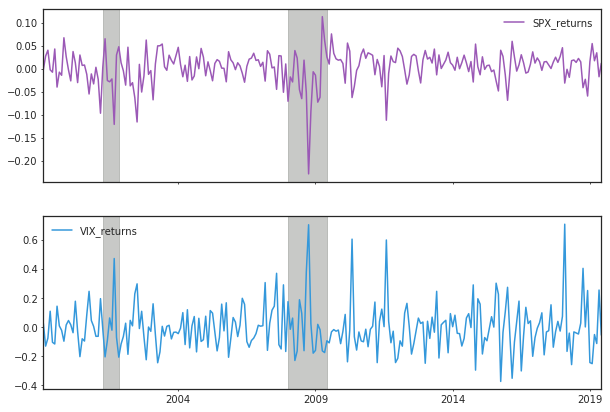

In [11]:
# Let's plot SPX and VIX cumulative returns with recession overlay
plot_cols = ['SPX_returns', 'VIX_returns']

# 2 axes for 2 subplots

fig, axes = plt.subplots(2,1, figsize=(10,7), sharex=True)
data[plot_cols].plot(subplots=True, ax=axes)
for ax in axes:
    ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
    ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)


In [12]:
#ADD CHART TITLES, AXIS LABELS, FANCY LEGEND, HORIZONTAL LINE

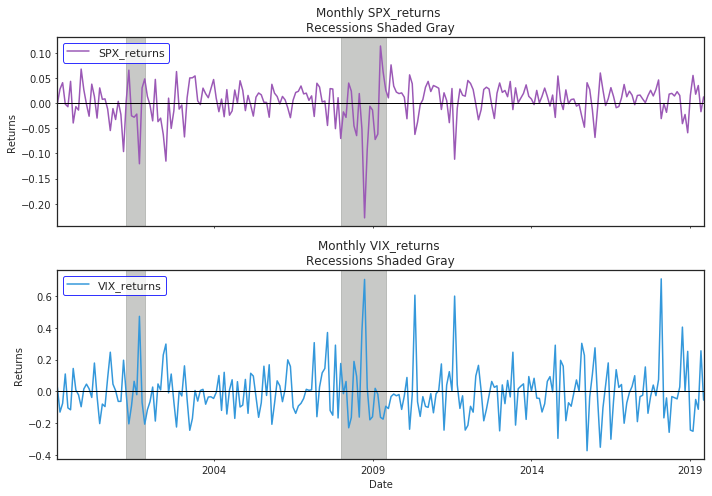

In [13]:
fig, axes = plt.subplots(2,1, figsize=(10,7), sharex=True)
data[plot_cols].plot(subplots=True, ax=axes)

# for subplots we must add features by subplot axis
for ax, col in zip(axes, plot_cols):
    ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
    ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)
    
    # lets add horizontal zero lines
    ax.axhline(0, color='k', linestyle='-', linewidth=1)
    
    # add titles
    ax.set_title('Monthly ' + col + ' \nRecessions Shaded Gray')
    
    # add axis labels
    ax.set_ylabel('Returns')
    ax.set_xlabel('Date')
    
    # add cool legend
    ax.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')  

# now to use tight layout
plt.tight_layout()


In [14]:
# Format X and Y axis tick labels

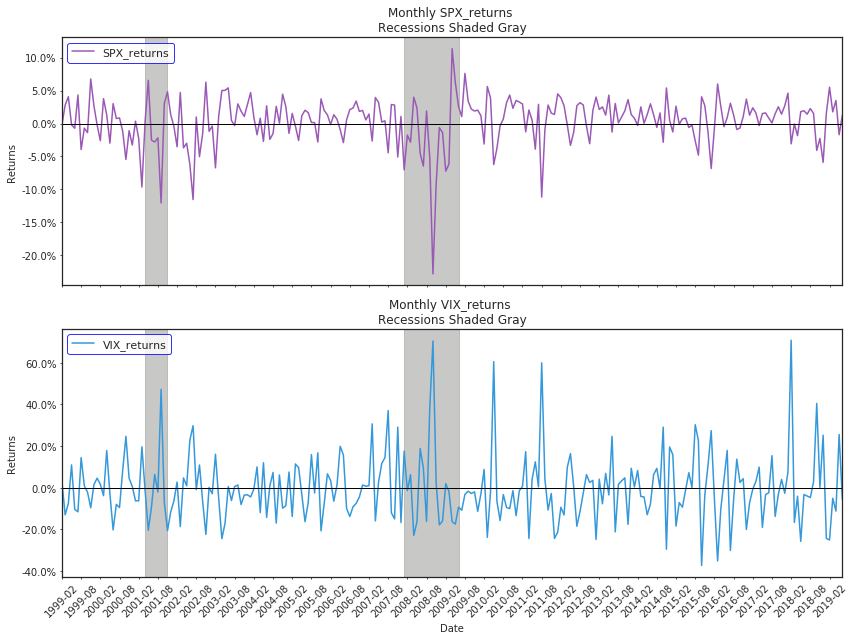

In [15]:
# better but I prefer more advanced axis tick labels

fig, axes = plt.subplots(2,1, figsize=(12,9), sharex=True)
data[plot_cols].plot(subplots=True, ax=axes)

# for subplots we must add features by subplot axis
for ax, col in zip(axes, plot_cols):
    ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
    ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)
    
    # lets add horizontal zero lines
    ax.axhline(0, color='k', linestyle='-', linewidth=1)
    
    # add titles
    ax.set_title('Monthly ' + col + ' \nRecessions Shaded Gray')
    
    # add axis labels
    ax.set_ylabel('Returns')
    ax.set_xlabel('Date')
    
    # upgrade axis tick labels
    yticks = ax.get_yticks()
    ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in yticks]);

    dates_rng = pd.date_range(data.index[0], data.index[-1], freq='6M')
    plt.xticks(dates_rng, [dtz.strftime('%Y-%m') for dtz in dates_rng], rotation=45)
    
    # add cool legend
    ax.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')  

# now to use tight layout
plt.tight_layout()


In [16]:
#change font and add data markers

/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib

/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib

/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib

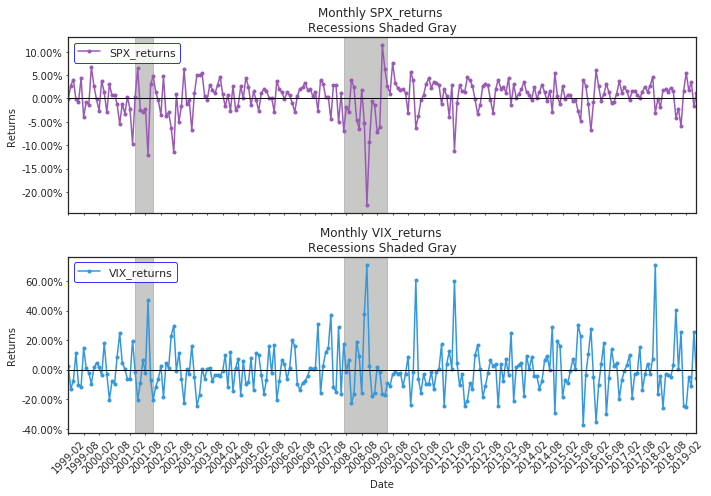

In [17]:
# I want markers for the data points, and change to font

mpl.rcParams['font.family'] = 'Ubuntu Mono'
fig, axes = plt.subplots(2,1, figsize=(10,7), sharex=True)
data[plot_cols].plot(subplots=True, ax=axes, marker='o', ms=3)

# for subplots we must add features by subplot axis
for ax, col in zip(axes, plot_cols):
    ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
    ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)
    
    # lets add horizontal zero lines
    ax.axhline(0, color='k', linestyle='-', linewidth=1)
    
    # add titles
    ax.set_title('Monthly ' + col + ' \nRecessions Shaded Gray')
    
    # add axis labels
    ax.set_ylabel('Returns')
    ax.set_xlabel('Date')
    
    # upgrade axis tick labels
    yticks = ax.get_yticks()
    ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in yticks]);

    dates_rng = pd.date_range(data.index[0], data.index[-1], freq='6M')
    plt.xticks(dates_rng, [dtz.strftime('%Y-%m') for dtz in dates_rng], rotation=45)
    
    # add cool legend
    ax.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')  

# now to use tight layout
plt.tight_layout()


In [18]:
# add chart annotations

In [19]:
# I want to know show the global max and mins and their dates

# --------------------------------------------------------------- #
# MAX SPX Returns
spx_max_ = data[plot_cols[0]].max()
spx_max_idx_ = data[plot_cols[0]].idxmax(axis=0, skipna=True)

# MIN SPX Returns
spx_min_ = data[plot_cols[0]].min()
spx_min_idx_ = data[plot_cols[0]].idxmin(axis=0, skipna=True)

# MAX VIX Returns
vix_max_ = data[plot_cols[1]].max()
vix_max_idx_ = data[plot_cols[1]].idxmax(axis=0, skipna=True)

# MIN VIX Returns
vix_min_ = data[plot_cols[1]].min()
vix_min_idx_ = data[plot_cols[1]].idxmin(axis=0, skipna=True)


In [21]:
# Now that we have this information we can get clever with the annotation tools Matplotlib provides.
# Also, I want to touch up some of the axis labels and axis tick labels as well. 

/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib

/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib

/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib

/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Ubuntu Mono'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/apps/apps1/a625533/anaconda3/lib/python3.6/site-packages/matplotlib

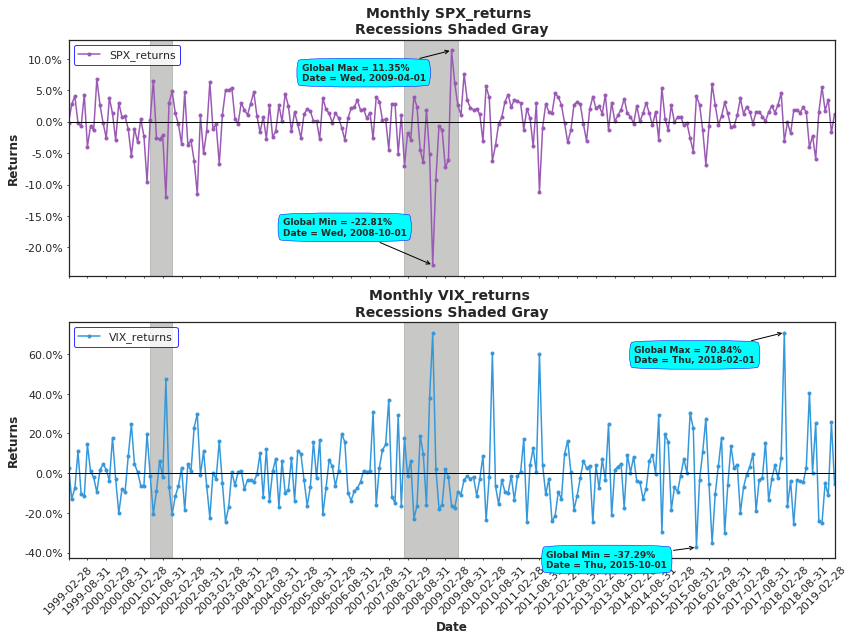

In [22]:

mpl.rcParams['font.family'] = 'Ubuntu Mono'
fig, axes = plt.subplots(2,1, figsize=(12,9), sharex=True)
data[plot_cols].plot(subplots=True, ax=axes, marker='o', ms=3)

# for subplots we must add features by subplot axis
for ax, col in zip(axes, plot_cols):
    ax.axvspan(recs2k_bgn, recs2k_end, color=sns.xkcd_rgb['grey'], alpha=0.5)
    ax.axvspan(recs2k8_bgn, recs2k8_end,  color=sns.xkcd_rgb['grey'], alpha=0.5)
    
    # lets add horizontal zero lines
    ax.axhline(0, color='k', linestyle='-', linewidth=1)
    
    # add titles
    ax.set_title('Monthly ' + col + ' \nRecessions Shaded Gray', fontsize=14, fontweight='demi')
    
    # add axis labels
    ax.set_ylabel('Returns', fontsize=12, fontweight='demi')
    ax.set_xlabel('Date', fontsize=12, fontweight='demi')
    
    # upgrade axis tick labels
    yticks = ax.get_yticks()
    ax.set_yticklabels(['{:3.1f}%'.format(x*100) for x in yticks]);

    dates_rng = pd.date_range(data.index[0], data.index[-1], freq='6M')
    plt.xticks(dates_rng, [dtz.strftime('%Y-%m-%d') for dtz in dates_rng], rotation=45)
    
    # bold up tick axes
    ax.tick_params(axis='both', which='major', labelsize=11)
    
    # add cool legend
    ax.legend(loc='upper left', fontsize=11, frameon=True).get_frame().set_edgecolor('blue')  
    
# add global max/min annotations
# add cool annotation box
bbox_props = dict(boxstyle="round4, pad=0.6", fc="cyan", ec="b", lw=.5)

axes[0].annotate('Global Max = {:.2%}\nDate = {}'
                 .format(spx_max_, spx_max_idx_.strftime('%a, %Y-%m-%d')),
            fontsize=9,
            fontweight='bold',
            xy=(spx_max_idx_, spx_max_),  
            xycoords='data',
            xytext=(-150, -30),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), bbox=bbox_props)    

axes[0].annotate('Global Min = {:.2%}\nDate = {}'
                 .format(spx_min_, spx_min_idx_.strftime('%a, %Y-%m-%d')),
            fontsize=9,
            fontweight='demi',
            xy=(spx_min_idx_, spx_min_),  
            xycoords='data',
            xytext=(-150, 30),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), bbox=bbox_props) 

axes[1].annotate('Global Max = {:.2%}\nDate = {}'
                 .format(vix_max_, vix_max_idx_.strftime('%a, %Y-%m-%d')),
            fontsize=9,
            fontweight='bold',
            xy=(vix_max_idx_, vix_max_),  
            xycoords='data',
            xytext=(-150, -30),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), bbox=bbox_props)    

axes[1].annotate('Global Min = {:.2%}\nDate = {}'
                 .format(vix_min_, vix_min_idx_.strftime('%a, %Y-%m-%d')),
            fontsize=9,
            fontweight='demi',
            xy=(vix_min_idx_, vix_min_),  
            xycoords='data',
            xytext=(-150, -20),      
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->"), bbox=bbox_props) 

# now to use tight layout
plt.tight_layout()






